In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("2019-Oct.csv")

In [3]:
categories=df['category_code'].unique()

In [4]:
df_categories = df[df.category_code != 'nan']
views = df_categories[df_categories.event_type == 'view']
purchases = df_categories[df_categories.event_type == 'purchase']

In [5]:
d1 = purchases.groupby('category_code').event_type.count().reset_index().rename(columns =
                                                    {'event_type':'purchases_number'})
d1['category'] = d1.apply(lambda row: str(row.category_code).split('.')[0], axis=1)
d1=d1.groupby('category').sum().reset_index().rename(columns ={'event_type':'purchases_number'})

In [6]:
d2 = views.groupby('category_code').event_type.count().reset_index().rename(columns =
                                                    {'event_type':'views'})


In [7]:
d1


,category,purchases_number
0,accessories,1587
1,apparel,8002
2,appliances,74996
3,auto,10620
4,computers,27855
5,construction,7801
6,country_yard,72
7,electronics,423028
8,furniture,8301
9,kids,5482


In [8]:
d2

,category_code,views
0,accessories.bag,188926
1,accessories.umbrella,3894
2,accessories.wallet,43282
3,apparel.belt,2448
4,apparel.costume,134511
...,...,...
121,sport.ski,3020
122,sport.snowboard,3747
123,sport.tennis,3526
124,sport.trainer,35272


In [9]:
def fun(x):
    return str(x).split('.')[0]

purchases["category_code"]=purchases["category_code"].apply(fun)



<ipython-input-9-0938fa03e2f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases["category_code"]=purchases["category_code"].apply(fun)


In [10]:
res=purchases.groupby(["category_id","product_id"])["event_type"].count().to_frame()

In [11]:
res

event_type
category_id         product_id            
2053013552226107603 8600036              1
                    8600037              2
                    8600043              1
                    8600044              1
                    8600067              9
...                                    ...
2175419595093967522 50700028             1
                    50700029             2
                    50700031             1
                    50700045             1
                    50700065             1

[42241 rows x 1 columns]

In [12]:
temp=res.sort_values('event_type', ascending= False).sort_index(level='category_id', sort_remaining=False)

In [13]:
temp

event_type
category_id         product_id            
2053013552226107603 8600067              9
                    8600175              7
                    8600140              3
                    8600037              2
                    8600036              1
...                                    ...
2175419595093967522 50700008             1
                    50700028             1
                    50700031             1
                    50700045             1
                    50700065             1

[42241 rows x 1 columns]

In [14]:
category_id=list(set(temp.index.get_level_values(0)))

In [15]:
for element in category_id:
    a=temp.xs(element,level="category_id")
    lenght=min(10,len(a))
    print (a[:lenght])

            event_type
product_id            
38000012             7
38000004             2
38000011             2
38000003             1
            event_type
product_id            
29501823            75
29502248            39
29501943            28
29502228            21
29502245            15
29501917            13
29501824            13
29502142            10
29502227             9
29501998             9
            event_type
product_id            
48300047             7
48300046             6
48300082             5
48300058             4
48300076             4
48300011             3
48300086             3
48300056             3
48300067             2
48300049             2
            event_type
product_id            
29501031            49
29501041            19
29501042            18
29502182             9
29501025             8
29501016             7
29501795             6
29502179             4
29502177             3
29501808             2
            event_type
product_id 

            event_type
product_id            
5801218            205
5800792            148
5800977            146
5801483            142
5801482            101
5801656             96
5800140             73
5800860             67
5801658             62
5801158             56
            event_type
product_id            
5701128            382
5701166            304
5700518            165
5700619            157
5701086            153
5701247            141
5700384            134
5701246            131
5700788            110
5700850            104
            event_type
product_id            
53000002             1
53000008             1
            event_type
product_id            
30900023            14
30900583            12
30900005            11
30901099            11
30901101             9
30900350             7
30900027             7
30901098             6
30901033             6
30900120             6
            event_type
product_id            
42600176            62
42600174   

13800007             4
            event_type
product_id            
13700138            21
13700195            21
13700159            20
13700323            19
13700077            18
13700211            15
13700078            15
13700160            11
13700223             9
13700184             7
            event_type
product_id            
43600050             7
43600029             4
43600012             3
43600020             3
43600058             3
43600023             2
43600025             2
43600026             2
43600005             1
43600015             1
            event_type
product_id            
13600340             8
13600235             3
13600301             3
13600009             3
13600021             3
13600028             3
13600000             3
13600007             3
13600297             2
13600081             2
            event_type
product_id            
52100001            16
52100005            11
52100004             6
52100000             5
52100020   

18900015             5
            event_type
product_id            
60400006             1
            event_type
product_id            
2300294             88
2300219             33
2300307             17
2300222             17
2300295             16
2300201             15
2300234             12
2300262             11
2300287              9
2300296              9
            event_type
product_id            
44100017             5
44100002             4
44100011             4
44100013             4
44100018             3
44100010             3
44100026             2
44100009             2
44100003             1
44100004             1
            event_type
product_id            
2201036            192
2200885             96
2201033             89
2240125             59
2201094             50
2201029             36
2240118             31
2201023             30
2200937             24
2201030             24
            event_type
product_id            
22600014             6
22600078   

47600013             1
            event_type
product_id            
27200348             7
27200624             6
27201257             4
27201875             4
27200363             3
27200595             3
27201331             3
27200678             3
27201184             3
27201510             3
            event_type
product_id            
46400010             1
46400016             1
46400020             1
            event_type
product_id            
54200003             2
54200001             1
            event_type
product_id            
55600006            22
55600000            17
55600013             9
55600044             6
55600007             4
55600011             2
55600030             2
55600029             1
            event_type
product_id            
38400004             6
38400026             6
38400047             6
38400114             4
38400037             4
38400014             3
38400015             3
38400048             2
38400082             2
38400088   

In [16]:
#rimanendo dell'idea che le categorie sono in category code e modificate come fatto prima (ma possiam comunque 
#consegnare entrambi i modi)

purchasesRQ3= purchases[purchases.category_code != 'nan']
purchasesRQ3= purchasesRQ3[purchasesRQ3.brand !="nan"]

In [17]:
#Un po lungo tutto su una riga, forse si ptorebbe spezzare... vi sembra corretto?
purchasesRQ3.groupby(["category_code","brand"]).price.mean().sort_values(ascending= False).sort_index(level='category_code', sort_remaining=False)
categories=purchasesRQ3.category_code.unique()

In [18]:
categories

array(['electronics', 'furniture', 'appliances', 'auto', 'computers',
       'construction', 'apparel', 'accessories', 'stationery', 'kids',
       'medicine', 'sport', 'country_yard'], dtype=object)

In [19]:
purchasesRQ3.groupby(["category_code","brand"]).price.mean().sort_values(ascending= False).sort_index(level='category_code', sort_remaining=False)


category_code  brand     
accessories    coccinelle    307.513333
               roncato       173.362500
               samsonite     149.295000
               thule         129.333548
               korin         113.343333
                                ...    
stationery     canon          12.314000
               colorfix        8.605000
               superfine       8.210000
               epson           6.832581
               barer           5.120000
Name: price, Length: 1266, dtype: float64

In [20]:
avg_category=purchasesRQ3.groupby(["category_code","brand"]).price.mean().sort_values(ascending= False).sort_index(level='category_code', sort_remaining=False)

In [21]:
avg_category=pd.DataFrame(avg_category)

In [22]:
avg_category

price
category_code brand                 
accessories   coccinelle  307.513333
              roncato     173.362500
              samsonite   149.295000
              thule       129.333548
              korin       113.343333
...                              ...
stationery    canon        12.314000
              colorfix      8.605000
              superfine     8.210000
              epson         6.832581
              barer         5.120000

[1266 rows x 1 columns]

In [23]:
categories=list(categories)
results=[]
for element in categories:
    temp=avg_category.xs(element,level="category_code")
    results.append((element,float(temp.head(1).values[0])))

In [24]:
results.sort(key=lambda x:x[1])
print(results)
#arrotondamento a parte, dovrebbe essere il risultato...

[('stationery', 34.105000000000004), ('medicine', 43.894835526315724), ('accessories', 307.5133333333333), ('apparel', 324.33), ('country_yard', 529.0566666666666), ('auto', 568.1864), ('furniture', 1029.22), ('sport', 1528.69), ('construction', 1796.216666666667), ('computers', 1801.82), ('kids', 2033.51), ('electronics', 2069.55), ('appliances', 2542.84)]


In [25]:
def plot(category):
    assert category in categories,"Non-existing category"
    temp=avg_category.xs(category,level="category_code").reset_index()
    y_lenght=math.ceil(len(temp)/5)
    fig = plt.figure(figsize=(15,y_lenght))
   
    plot = sns.barplot(y="brand", x='price', data=temp)
    plot.set(xlabel="average price", ylabel=category)

#Ho messo il grafico con avg price sull'asse x in modo da non fare casini quando si chiama la funzione su una categoria grande,
#provate con electronics volendo. La y_lenght è variabile

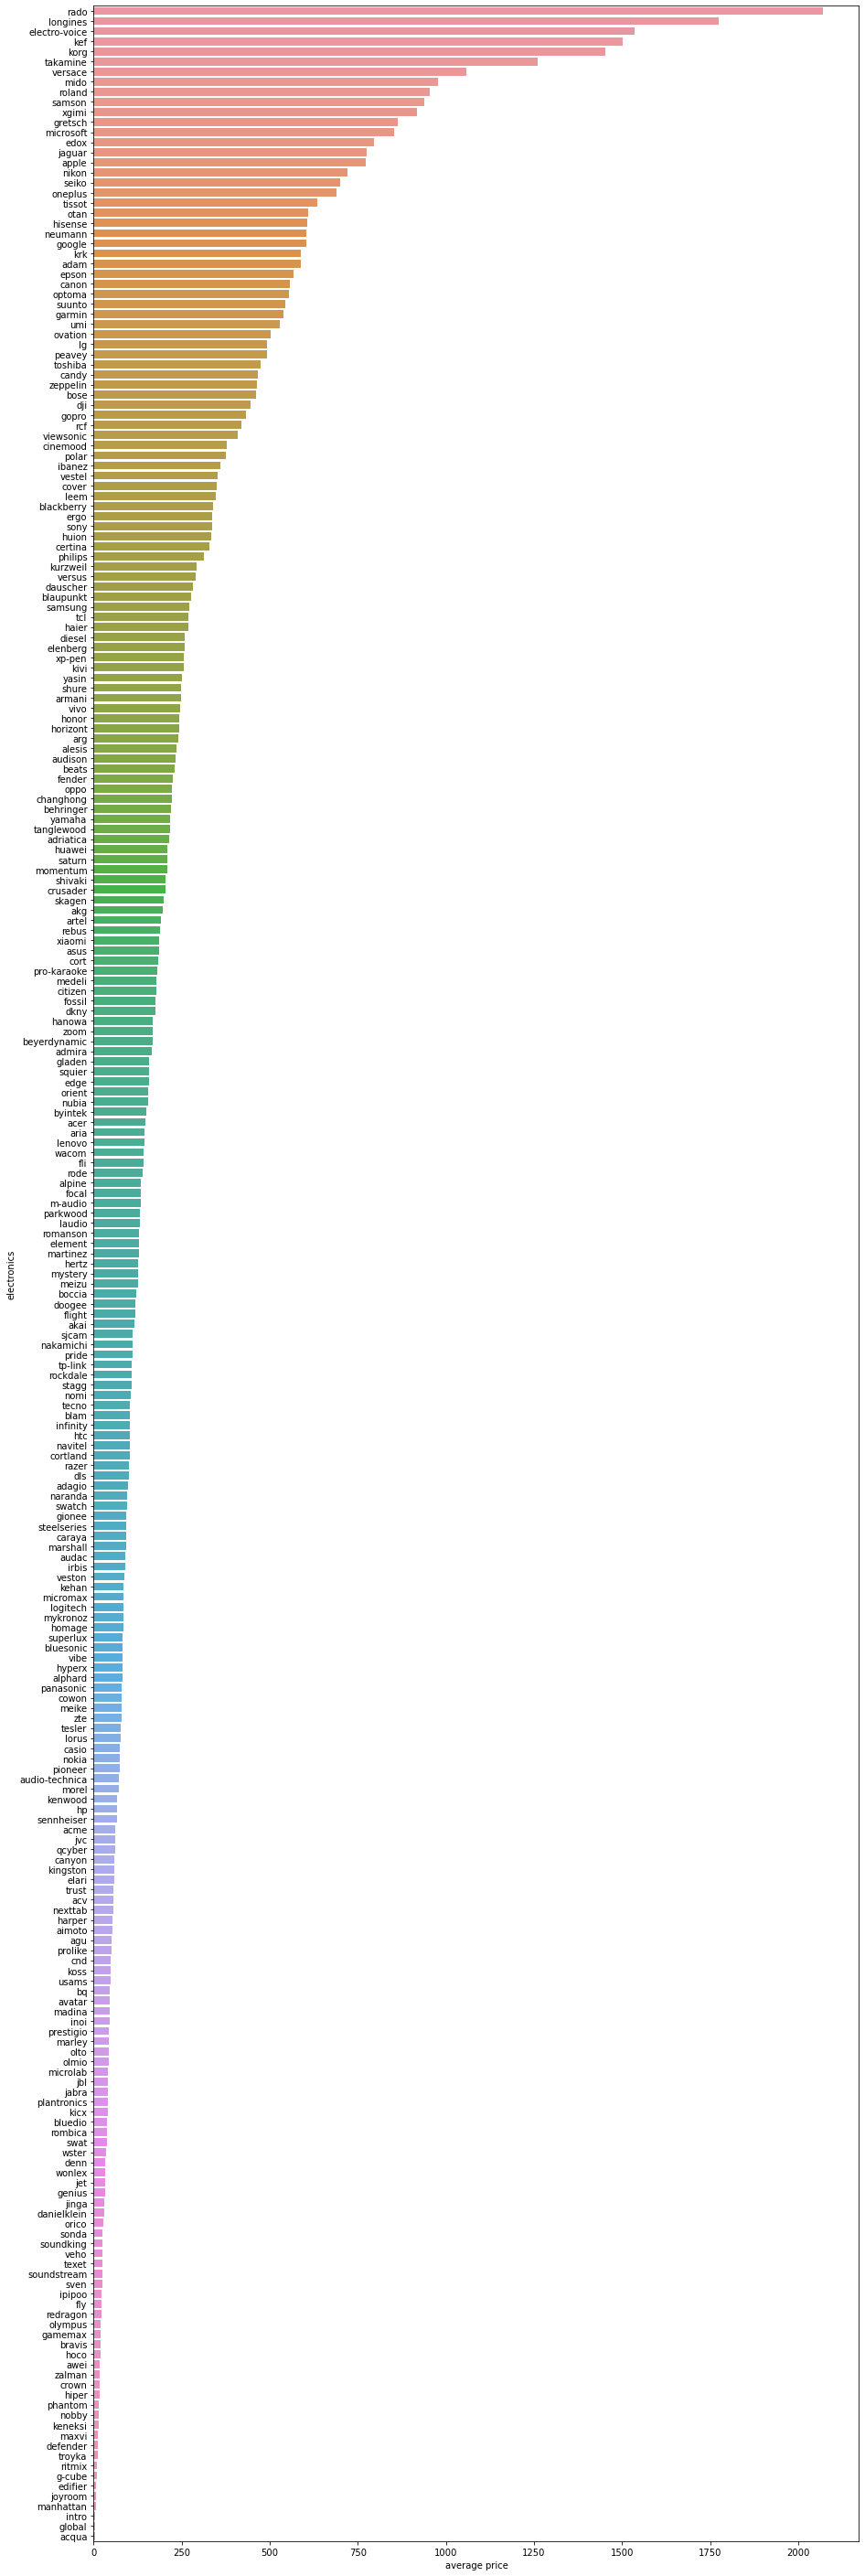

In [26]:
plot("electronics")